In [1]:
# link = https://fifemon.fnal.gov/kibana/app/kibana#/visualize/edit/33d02c40-8b41-11ee-804b-5759672b811c?_g=(refreshInterval:(pause:!t,value:0),time:(from:'2022-01-01T06:00:00.000Z',mode:absolute,to:'2023-11-25T03:09:25.714Z'))&_a=(filters:!(),linked:!f,query:(language:lucene,query:'Jobsub_Group:dune'),uiState:(vis:(params:(sort:(columnIndex:!n,direction:!n)))),vis:(aggs:!((enabled:!t,id:'1',params:(field:SlotHours),schema:metric,type:sum),(enabled:!t,id:'3',params:(field:MachineAttrGLIDEIN_DUNESite0,missingBucket:!f,missingBucketLabel:Missing,order:desc,orderBy:'1',otherBucket:!f,otherBucketLabel:Other,size:50),schema:bucket,type:terms),(enabled:!t,id:'5',params:(customInterval:'2h',drop_partials:!f,extended_bounds:(),field:'@timestamp',interval:M,min_doc_count:1,timeRange:(from:'2022-01-01T06:00:00.000Z',mode:absolute,to:'2023-11-25T03:09:25.714Z'),useNormalizedEsInterval:!t),schema:bucket,type:date_histogram),(enabled:!t,id:'4',params:(filters:!((input:(query:'NOT(Owner:dunepro)%20AND%20NOT(Jobsub_SubGroup:mars)'),label:Analysis),(input:(query:'Owner:dunepro'),label:Production),(input:(query:'Jobsub_SubGroup:mars'),label:MARS),(input:(query:'*'),label:Total))),schema:bucket,type:filters)),params:(perPage:24,showMetricsAtAllLevels:!f,showPartialRows:!f,showTotal:!f,sort:(columnIndex:!n,direction:!n),totalFunc:sum),title:'DUNE%20monthly%20slot%20hours%20by%20site%20and%20role',type:table))

# link for 2022-23 monthly

# https://fifemon.fnal.gov/kibana/app/kibana#/visualize/edit/b31bfcc0-c095-11ee-82e9-098fee8b63d4?_g=(refreshInterval:(pause:!t,value:0),time:(from:'2022-01-01T06:00:00.000Z',mode:absolute,to:'2024-01-01T05:59:59.999Z'))&_a=(filters:!(),linked:!f,query:(language:lucene,query:'Jobsub_Group:dune'),uiState:(vis:(params:(sort:(columnIndex:!n,direction:!n)))),vis:(aggs:!((enabled:!t,id:'1',params:(field:SlotHours),schema:metric,type:sum),(enabled:!t,id:'3',params:(field:MachineAttrGLIDEIN_DUNESite0,missingBucket:!f,missingBucketLabel:Missing,order:desc,orderBy:'1',otherBucket:!f,otherBucketLabel:Other,size:50),schema:bucket,type:terms),(enabled:!t,id:'5',params:(customInterval:'2h',drop_partials:!f,extended_bounds:(),field:'@timestamp',interval:M,min_doc_count:1,timeRange:(from:'2022-01-01T06:00:00.000Z',mode:absolute,to:'2023-11-25T03:09:25.714Z'),useNormalizedEsInterval:!t),schema:bucket,type:date_histogram),(enabled:!t,id:'4',params:(filters:!((input:(query:'NOT(Owner:dunepro)%20AND%20NOT(Jobsub_SubGroup:mars)'),label:Analysis),(input:(query:'Owner:dunepro'),label:Production),(input:(query:'Jobsub_SubGroup:mars'),label:MARS),(input:(query:'*'),label:Total))),schema:bucket,type:filters)),params:(perPage:24,showMetricsAtAllLevels:!f,showPartialRows:!f,showTotal:!f,sort:(columnIndex:!n,direction:!n),totalFunc:sum),title:'DUNE%20monthly%20slot%20hours%20by%20site%20and%20role%202022-2023',type:table))

# link for recent 30 days
# https://fifemon.fnal.gov/kibana/app/kibana#/visualize/edit/82db48e0-9db3-11ee-bfa5-035ce1463523?_g=(refreshInterval:(pause:!t,value:0),time:(from:now-30d,mode:quick,to:now))&_a=(filters:!(),linked:!f,query:(language:lucene,query:'Jobsub_Group:dune'),uiState:(vis:(params:(sort:(columnIndex:!n,direction:!n)))),vis:(aggs:!((enabled:!t,id:'1',params:(field:SlotHours),schema:metric,type:sum),(enabled:!t,id:'3',params:(field:MachineAttrGLIDEIN_DUNESite0,missingBucket:!f,missingBucketLabel:Missing,order:desc,orderBy:'1',otherBucket:!f,otherBucketLabel:Other,size:50),schema:bucket,type:terms),(enabled:!t,id:'5',params:(customInterval:'2h',drop_partials:!f,extended_bounds:(),field:'@timestamp',interval:d,min_doc_count:1,timeRange:(from:now-30d,mode:quick,to:now),useNormalizedEsInterval:!t),schema:bucket,type:date_histogram),(enabled:!t,id:'4',params:(filters:!((input:(query:'NOT(Owner:dunepro)%20AND%20NOT(Jobsub_SubGroup:mars)'),label:Analysis),(input:(query:'Owner:dunepro'),label:Production),(input:(query:'Jobsub_SubGroup:mars'),label:MARS),(input:(query:'*'),label:Total))),schema:bucket,type:filters)),params:(perPage:24,showMetricsAtAllLevels:!f,showPartialRows:!f,showTotal:!f,sort:(columnIndex:!n,direction:!n),totalFunc:sum),title:'DUNE%20daily%20slot%20hours%20by%20site%20and%20role',type:table))

In [2]:
# go to that link, go to inspect and save as formatted csv


In [3]:
# define  bydate(array=None,types=None,locations=None,dates=None,units=None,tag=None):

In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math


In [5]:
scale = "monthly"
if scale == "monthly":
    input = "DUNE monthly slot hours by site and role-6.csv"  # updated Jan 1 2024
    input = "Fixed2022-2023.csv"  # full year for 2022-23
else:
    input = "DUNE daily slot hours by site and role.csv"
    
outunits = "kHS23-Yrs"
outunits = "CoreYears"
#outunits = "MHr"
lowdate = "2023-01-01"
highdate = "2023-12-31" 


In [6]:
 def bydate(array=None,types=None,locations=None,dates=None,unitlabel=None,format="10.3f",tag=None,ldate=None,hdate=None):
    # method that makes a table from an array indexed by type, location and date by location and date.
    # tag is a tag that tells what the array was
    # adds a sum across both row and column
    # output is a csv file of the table
    if ldate != None:
        lowdate = ldate
    else:
        lowdate = dates[0]
    if hdate != None:
        highdate = hdate
    else:
        highdate = dates[-1]
    print (lowdate,highdate)
    header = "   time in %s by %s     "%(unitlabel,tag)
    header2 = header

    for date in dates:
        header += "%10s"%date
        header2 += ",%s"%date
    header += "     Total"
    header2 += ",Total\n"
    form = ", %%%s"%format
    form = ", "+format
    print ("format is ", form)
    out = {}
    for type in types:
        outname = "csv/%s_%s_%s_%s_%s.csv"%(type,tag,unitlabel,lowdate,highdate)
        out[type] = open(outname,'w')
        out[type].write(header2)

    #print (locations) 

    for type in types:  
        totalbydate = {}
        for date in dates:
            totalbydate[date] = 0.0
        totaltotal = 0.0
        for site in locations:
            result = "%30s"%site
            outstring = "%s"%site
            total = 0.0
            
            #print (form)
            for date in dates:
                #print ("check",type,site,date,array[type][site][date])
                result += " %10.3f"%(array[type][site][date])
                #print ("result",result,form)
                outstring += form%(array[type][site][date])  # temp change from form to 10d
                total += (array[type][site][date])
                totalbydate[date]+= (array[type][site][date])
            totaltotal+=total           
            outstring += form%total
            outstring += "\n"
            #print (outstring)
            out[type].write(outstring)
        outstring = "%s"%"Total"
        for date in dates:
            outstring += form%(totalbydate[date])
        outstring += form%totaltotal # temp change from form to 10d
        outstring += "\n"
        out[type].write(outstring)
        out[type].close()


In [7]:
def plotme(tuple=None,unitlabel=None,tag=None,scale=None):
     
    ny = len(tuple.keys())
    for y in tuple.keys():
        nx = len(tuple[y])
        break
    
    data = np.zeros((nx,ny),dtype=float)
    #print (nx,ny)
    #print (data)
    
    ix = 0
    for kx  in list(tuple.keys()):
        if kx == "Total": continue
        iy = 0
        
        for ky in list(tuple[kx].keys()):
            if ky == "Total": continue
            #print (kx,ky,ix,iy)
            # convert to log without messing with original data
            data[iy][ix] = (tuple[kx][ky])
            if data[iy][ix] <= 0: data[iy][ix] = min/10.
            data[iy][ix] = math.log10(data[iy][ix])       
            iy += 1
        ix += 1
   
    data = data.transpose()
    
    
    
    plt.figure(figsize = (nx/2.,ny/3.))
    plt.imshow(data,aspect='auto') 
    plt.subplots_adjust(left=0.30)
    ax = plt.gca()
    #plt.set_size_inches(nx/3., ny/3.) 

    # axes = plt.gcf().axes 
    # ax = axes[0]
    # ay = axes[1]
    # print (axes)
    plt.ylabel("Location")
    y_tick_labels = list(tuple.keys())
    x_tick_labels = list(tuple[y_tick_labels[0]].keys())
    plt.title("Log10 %s for %s"%(unitlabel,tag.replace("_"," ")))
    ax.xaxis.set_ticks(np.arange(0,len(x_tick_labels),1))
    ax.yaxis.set_ticks(np.arange(0,len(y_tick_labels),1))
    ax.set_xticklabels(x_tick_labels, rotation=70, fontsize=10)
    ax.set_yticklabels(y_tick_labels, fontsize=10)
    plt.xlabel("Month")
    cbar = plt.colorbar()
    cbar.set_label("Log10 of %s"%unitlabel, rotation=270)
    plt.savefig("pix/"+scale+"/"+tag+".png",transparent=False)       
    
    

In [8]:


# ken
#  https://fifemon.fnal.gov/kibana/app/kibana#/visualize/edit/33d02c40-8b41-11ee-804b-5759672b811c?_g=(refreshInterval:(pause:!t,value:0),time:(from:'2022-01-01T06:00:00.000Z',mode:absolute,to:'2023-11-25T03:09:25.714Z'))&_a=(filters:!(),linked:!f,query:(language:lucene,query:'Jobsub_Group:dune'),uiState:(vis:(params:(sort:(columnIndex:!n,direction:!n)))),vis:(aggs:!((enabled:!t,id:'1',params:(field:SlotHours),schema:metric,type:sum),(enabled:!t,id:'3',params:(field:MachineAttrGLIDEIN_DUNESite0,missingBucket:!f,missingBucketLabel:Missing,order:desc,orderBy:'1',otherBucket:!f,otherBucketLabel:Other,size:50),schema:bucket,type:terms),(enabled:!t,id:'5',params:(customInterval:'2h',drop_partials:!f,extended_bounds:(),field:'@timestamp',interval:M,min_doc_count:1,timeRange:(from:'2022-01-01T06:00:00.000Z',mode:absolute,to:'2023-11-25T03:09:25.714Z'),useNormalizedEsInterval:!t),schema:bucket,type:date_histogram),(enabled:!t,id:'4',params:(filters:!((input:(query:'NOT(Owner:dunepro)%20AND%20NOT(Jobsub_SubGroup:mars)'),label:Analysis),(input:(query:'Owner:dunepro'),label:Production),(input:(query:'Jobsub_SubGroup:mars'),label:MARS),(input:(query:'*'),label:Total))),schema:bucket,type:filters)),params:(perPage:24,showMetricsAtAllLevels:!f,showPartialRows:!f,showTotal:!f,sort:(columnIndex:!n,direction:!n),totalFunc:sum),title:'DUNE%20monthly%20slot%20hours%20by%20site%20and%20role',type:table))

# wenlong https://fifemon.fnal.gov/kibana/app/kibana#/dashboard/83d7b0c0-8b1c-11ee-804b-5759672b811c?_g=(refreshInterval:(pause:!t,value:0),time:(from:now-1y,mode:quick,to:now))&_a=(description:%27%27,filters:!(),fullScreenMode:!f,options:(darkTheme:!t,hidePanelTitles:!f,useMargins:!t),panels:!((embeddableConfig:(),gridData:(h:14,i:%271%27,w:48,x:0,y:0),id:%2757162130-8b1b-11ee-804b-5759672b811c%27,panelIndex:%271%27,type:visualization,version:%276.8.23%27),(embeddableConfig:(),gridData:(h:16,i:%272%27,w:48,x:0,y:14),id:%275ee81fc0-8b1c-11ee-804b-5759672b811c%27,panelIndex:%272%27,type:visualization,version:%276.8.23%27)),query:(language:lucene,query:%27%27),timeRestore:!t,title:fifebatch-jobs-dune,viewMode:view)

# set up fo runits

name = input
inunits="Hr"
HoursPerYear=(24*365)
HoursPerMonth=HoursPerYear/12.
HS23PerCPUHr = 11.
kHS23PerCPUHr = HS23PerCPUHr/1000.
kHS23PerCPUYr=kHS23PerCPUHr/HoursPerYear
Units = {"MHr":1/1000000.,"CoreYears":1./HoursPerYear,"kHS23-Hrs":kHS23PerCPUHr,"kHS23-Yrs":kHS23PerCPUYr}
Formats = {"MHr":"10.3f", "CoreYears":"10d", "kHS23-Hrs":"10d","kHS23-Yrs":"%10.3f"}

units=Units[outunits]
format=Formats[outunits]

In [9]:
Data = {}
ByCountry = {}
sites = []
types = []
dates = []
countries = []

In [10]:
# read in csv and parse into array

with open(name,'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    
    for row in csv_reader:
        #print (row)
        line_count += 1
        if line_count == 1:
            labels = row
            continue
        site = row[0] 
        country = site.split("_")[0]
        if country == "US":
            if "FNAL" in site or "Fermi" in site:
                country = "US FNAL"
            else:
                country = "US OSG"
        date = row[1][0:10] # truncate the day
        
        if date < lowdate: 
            continue
        if date > highdate:
            continue
        type = row[2]
        value = float(row[3].replace(",",""))*units
        

        
        if type not in Data.keys():
            #print ("add type",type)
            Data[type]={}
            types.append(type)
            
        if site not in Data[type].keys():
            #print ("add site",site)
            Data[type][site]={}
        
        
        if type not in types: types.append(type)
        if site not in sites: sites.append(site)
        if date not in dates: dates.append(date)
        if country not in countries: countries.append(country)
        
        Data[type][site][date]=value
         
        
#print (dates)
sites.sort()
countries.sort()
 

# reset lowdate and highdate if outside range of inputs. 
print ("dates",dates)
if dates[0] > lowdate:
    print ("adjust low date", dates[0],lowdate)
    lowdate = dates[0]

#if dates[-1] < highdate:
#    highdate = dates[-1]
#    print ("adjust high date", dates[-1],highdate)


dates ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01']


In [11]:
# fill in the blanks 
max = 0.0
min = 10000000
for type in types:
    for site in sites:
        if site not in Data[type].keys():
            Data[type][site]={}
        for date in dates:
            if date not in Data[type][site].keys():
                Data[type][site][date] = 0.0
            if Data[type][site][date] > max: 
                max = Data[type][site][date]
            if Data[type][site][date] < min and Data[type][site][date] > 0: 
                min = Data[type][site][date]

if max > 10: format = "%10d"
        
# make a NoMARS class with MARS subtracted

types.append("NoMARS")
Data["NoMARS"] = {}
for site in sites:
    Data["NoMARS"][site] = {}
    for date in dates:
        Data["NoMARS"][site][date] = Data["Total"][site][date]-Data["MARS"][site][date]
        

In [12]:

# do this explicitly where needed

# trim the dates list
# newdates = []
# for date in dates:
#     if date < lowdate or date > highdate:
#                 continue
#     newdates.append(date)
# dates = newdates
# print (dates)


In [13]:
BySite = {}
# do by site within date range
for type in types:
    BySite[type]={}
    for site in sites:
        BySite[type][site]={}
        for date in dates:
            BySite[type][site][date] = Data[type][site][date]

In [14]:
print ("                                     Usage in %s between %s and %s"%(outunits,lowdate,highdate))
print ("%30s %10s %10s %10s %10s %10s"%("Site","Production","Analysis","NoMARS","MARS","Total"))
csvout = "%30s,%10s,%10s,%10s,%10s,%10s\n"%("Site","Production","Analysis","NoMARS","MARS","Total")
csvname = "csv/Usage_%s_%s-%s_Bytype.csv"%(outunits,lowdate,highdate)
csvf = open(csvname,'w')
csvf.write(csvout)
ByType={}
for site in sites:
    ByType[site]={}
totalacrosssite={}

for type in ["Production","Analysis","MARS","NoMARS","Total"]:
    totalacrosssite[type] = 0.0
for site in sites:
    use = {}
    for type in ["Production","Analysis","MARS","NoMARS","Total"]:
        use[type] = 0.0        
        for date in dates:
            if date < lowdate or date > highdate: continue
            use[type] += BySite[type][site][date]
        ByType[site][type]=use[type]
        totalacrosssite[type] += use[type]
    if "10.3" in format: 
        print ("%30s %10.3f %10.3f %10.3f %10.3f %10.3f"%(site,use["Production"],use["Analysis"],use["NoMARS"],use["MARS"],use["Total"])) 
        csvout = "%30s,%10.3f,%10.3f,%10.3f,%10.3f,%10.3f\n"%(site,use["Production"],use["Analysis"],use["NoMARS"],use["MARS"],use["Total"])
    else:
        print ("%30s %10d %10d %10d %10d %10d"%(site,use["Production"],use["Analysis"],use["NoMARS"],use["MARS"],use["Total"])) 
        csvout = "%30s,%10d,%10d,%10d,%10d,%10d\n"%(site,use["Production"],use["Analysis"],use["NoMARS"],use["MARS"],use["Total"])
    csvf.write(csvout)
totalacrosssite["NoMARS"] = totalacrosssite["Total"] - totalacrosssite["MARS"]

if "10.3" in format:
    print ("%30s %10.3f %10.3f %10.3f %10.3f %10.3f"%("Total",totalacrosssite["Production"],totalacrosssite["Analysis"],totalacrosssite["NoMARS"],totalacrosssite["MARS"],totalacrosssite["Total"]))  
    csvout = "%30s,%10.3f,%10.3f,%10.3f,%10.3f,%10.3f\n"%("Total",totalacrosssite["Production"],totalacrosssite["Analysis"],totalacrosssite["NoMARS"],totalacrosssite["MARS"],totalacrosssite["Total"])
else:
    print ("%30s %10d %10d %10d %10d %10d"%("Total",totalacrosssite["Production"],totalacrosssite["Analysis"],totalacrosssite["NoMARS"],totalacrosssite["MARS"],totalacrosssite["Total"]))
    csvout = "%30s,%10d,%10d,%10d,%10d,%10d\n"%("Total",totalacrosssite["Production"],totalacrosssite["Analysis"],totalacrosssite["NoMARS"],totalacrosssite["MARS"],totalacrosssite["Total"])
csvf.write(csvout)

csvf.close()

                                     Usage in CoreYears between 2023-01-01 and 2023-12-31
                          Site Production   Analysis     NoMARS       MARS      Total
                       BR_CBPF         26          9         36          0         36
                        CA_SFU          0          0          0          0          0
                   CA_Victoria          7         13         20          0         20
                          CERN         57         83        140          0        140
                 CH_UNIBE-LHEP          2          0          2          0          2
                        CZ_FZU         51         48         99          0         99
                     ES_CIEMAT          0          2          2          0          2
                        ES_PIC         19         23         43          0         43
                    FR_CCIN2P3         34         24         59          0         59
                       IN_TIFR          5         

In [15]:
# do by country
print (countries)
for type in types:
    ByCountry[type]={}
    for country in countries:

        ByCountry[type][country]={}
        for date in dates:
            ByCountry[type][country][date] = 0.0
    for site in sites:
        country = site.split("_")[0]
        if country == "US":
            if "FNAL" in site or "FermiGrid" in site:
                country = "US FNAL"
            else:
                country = "US OSG"
       # print ("check country", site, country)
        for date in dates:
            ByCountry[type][country][date]+=Data[type][site][date]

['BR', 'CA', 'CERN', 'CH', 'CZ', 'ES', 'FR', 'IN', 'IT', 'NL', 'RU', 'UK', 'US FNAL', 'US OSG', 'undefined']


In [16]:
print ("                              Usage in %s between %s and %s"%(outunits,lowdate,highdate))
print ("%30s %10s %10s %10s %10s %10s"%("Country","Production","Analysis","NoMARS","MARS","Total"))
csvout = "%30s,%10s,%10s,%10s,%10s,%10s\n"%("Site","Production","Analysis","NoMARS","MARS","Total")
csvname = "csv/Usage_%s_%s-%s_ByCountry.csv"%(outunits,lowdate,highdate)
csvf = open(csvname,'w')
csvf.write(csvout)

totalacrosscountry={}
for type in types:
    totalacrosscountry[type] = 0.0
for site in countries:
    use = {}
    for type in types:
        use[type] = 0.0        
        for date in dates:
            if date < lowdate or date > highdate: continue
            use[type] += ByCountry[type][site][date]
        totalacrosscountry[type] += use[type]
    if "10.3" in format:
        print ("%30s %10.3f %10.3f %10.3f %10.3f %10.3f"%(site,use["Production"],use["Analysis"],use["NoMARS"],use["MARS"],use["Total"])) 
        csvout = "%30s,%10.3f,%10.3f,%10.3f,%10.3f,%10.3f\n"%(site,use["Production"],use["Analysis"],use["NoMARS"],use["MARS"],use["Total"])
    else:
        print ("%30s %10d %10d %10d %10d %10d"%(site,use["Production"],use["Analysis"],use["NoMARS"],use["MARS"],use["Total"])) 
        csvout = "%30s,%10d,%10d,%10d,%10d,%10d\n"%(site,use["Production"],use["Analysis"],use["NoMARS"],use["MARS"],use["Total"])
    csvf.write(csvout)
if "10.3" in format:
    print ("%30s %10.3f %10.3f %10.3f %10.3f %10.3f"%("Total",totalacrosscountry["Production"],totalacrosscountry["Analysis"],totalacrosscountry["NoMARS"],totalacrosscountry["MARS"],totalacrosscountry["Total"]))  
    csvout = "%30s,%10.3f,%10.3f,%10.3f,%10.3f,%10.3f\n"%("Total",totalacrosscountry["Production"],totalacrosscountry["Analysis"],totalacrosscountry["NoMARS"],totalacrosscountry["MARS"],totalacrosscountry["Total"])
else:
    print ("%30s %10d %10d %10d %10d %10d"%("Total",totalacrosscountry["Production"],totalacrosscountry["Analysis"],totalacrosscountry["NoMARS"],totalacrosscountry["MARS"],totalacrosscountry["Total"]))
    csvout = "%30s,%10d,%10d,%10d,%10d,%10d\n"%("Total",totalacrosscountry["Production"],totalacrosscountry["Analysis"],totalacrosscountry["NoMARS"],totalacrosscountry["MARS"],totalacrosscountry["Total"])
csvf.write(csvout)
csvf.close()

                              Usage in CoreYears between 2023-01-01 and 2023-12-31
                       Country Production   Analysis     NoMARS       MARS      Total
                            BR         26          9         36          0         36
                            CA          7         14         21          0         21
                          CERN         57         83        140          0        140
                            CH          2          0          2          0          2
                            CZ         51         48         99          0         99
                            ES         19         25         45          0         45
                            FR         34         24         59          0         59
                            IN          5         33         38          0         38
                            IT          0          7          7          0          7
                            NL        110         88     

In [17]:
bydate(array=Data,types=types,locations=sites,dates=dates,unitlabel=outunits,format=format,tag="BySite",ldate=lowdate,hdate=highdate)

2023-01-01 2023-12-31
format is  , %10d


In [18]:

bydate(array=ByCountry,types=types,locations=countries,dates=dates,unitlabel=outunits,format=format,tag="ByCountry",ldate=lowdate,hdate=highdate)

2023-01-01 2023-12-31
format is  , %10d


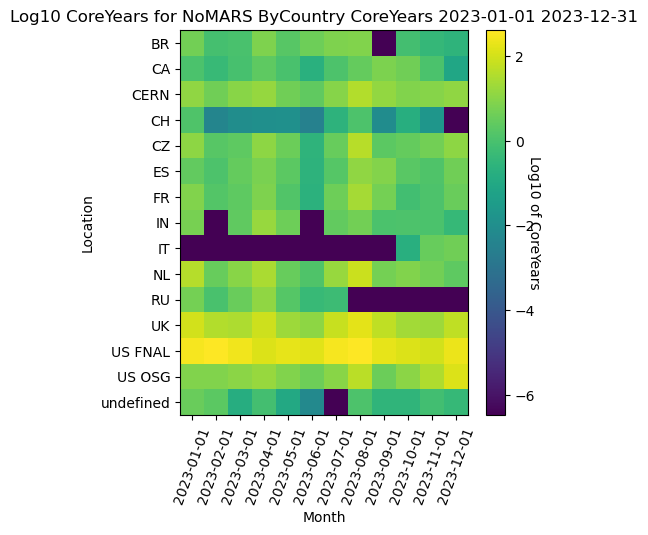

In [19]:

plttag = "%s_%s_%s_%s_%s"%("NoMARS","ByCountry",outunits,lowdate,highdate)
plotme(ByCountry["Total"],outunits,tag=plttag,scale=scale)

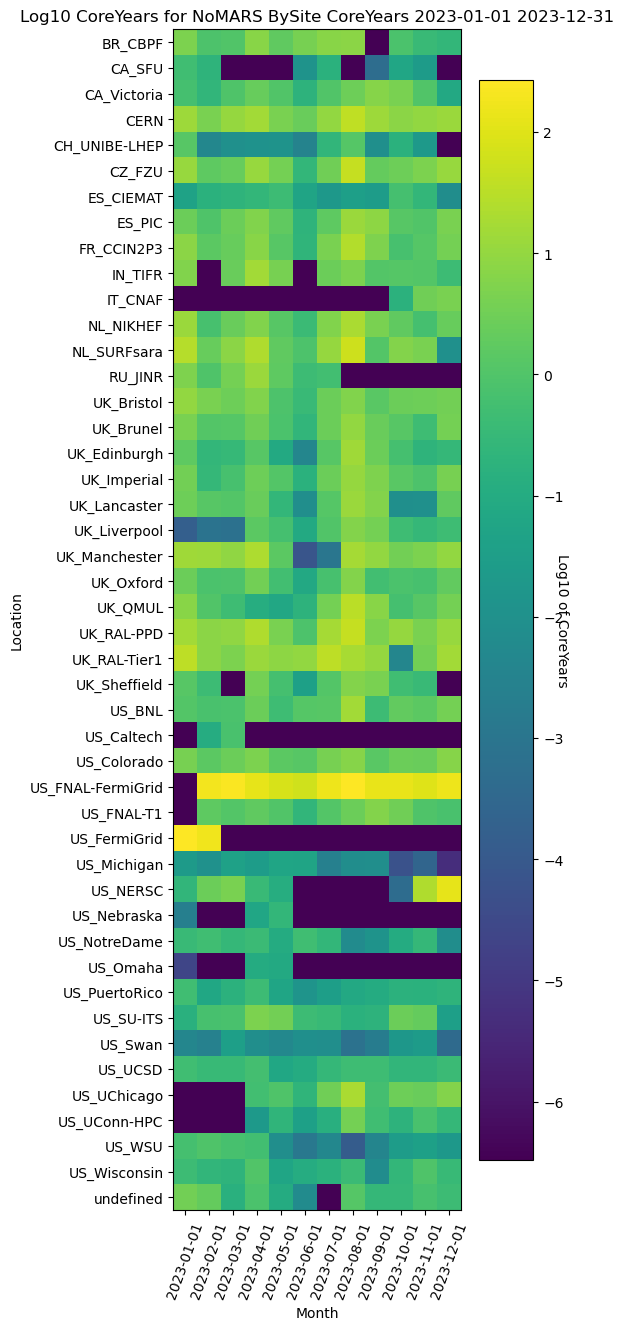

In [20]:
plttag = "%s_%s_%s_%s_%s"%(type,"BySite",outunits,lowdate,highdate)
plotme(BySite["NoMARS"],outunits,tag=plttag,scale=scale)

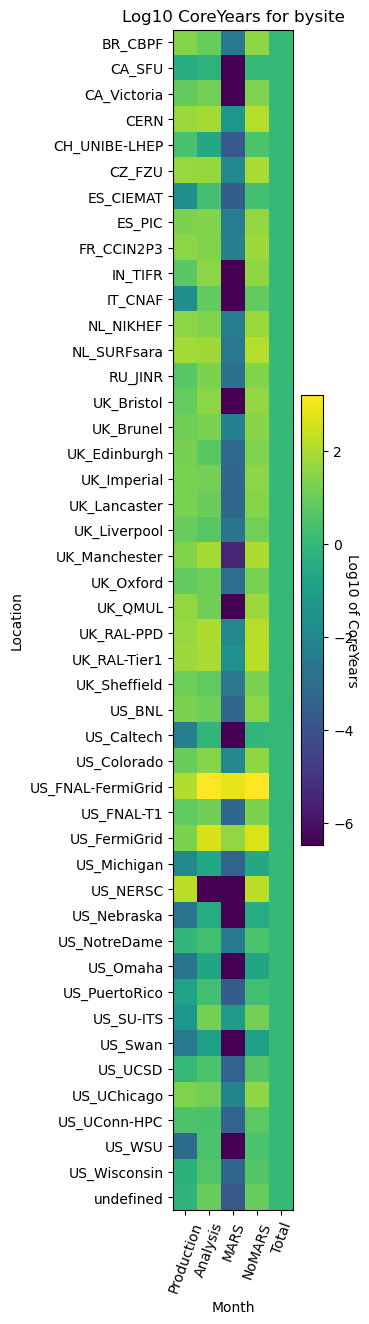

In [21]:
plotme(ByType,outunits,tag="bysite",scale=scale)
#print (ByType["US_FermiGrid"])

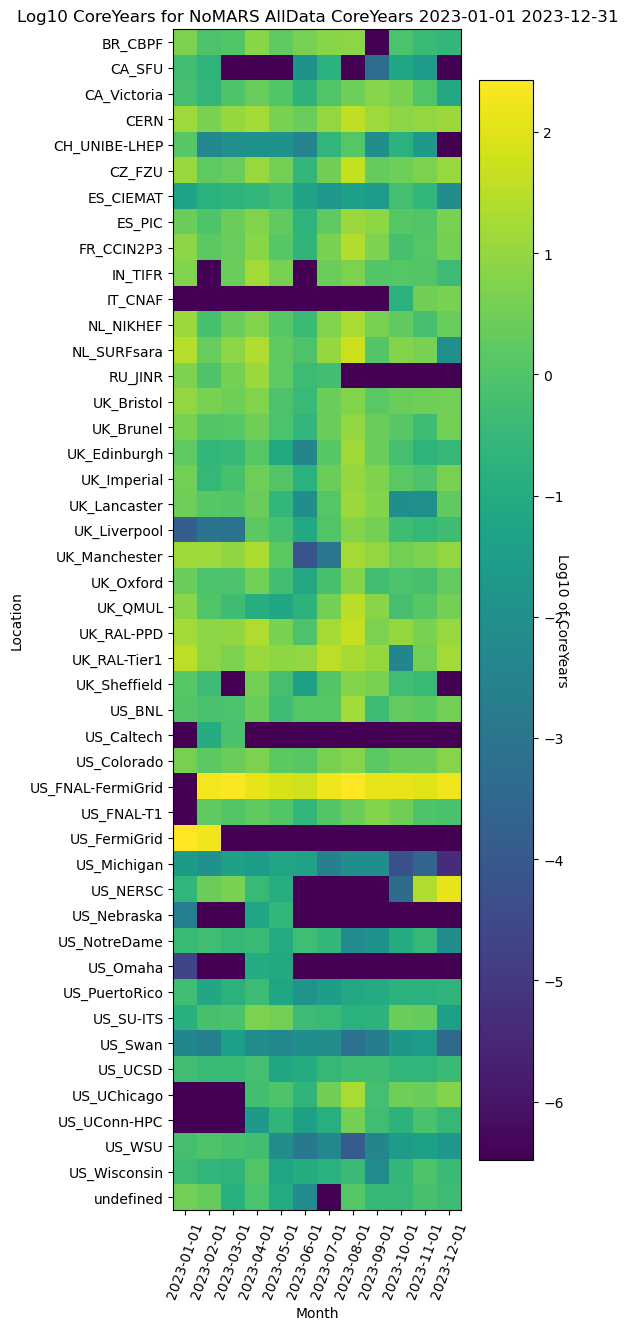

In [22]:
plttag = "%s_%s_%s_%s_%s"%("NoMARS","AllData",outunits,lowdate,highdate)
plotme(Data["NoMARS"],outunits,tag=plttag,scale=scale)

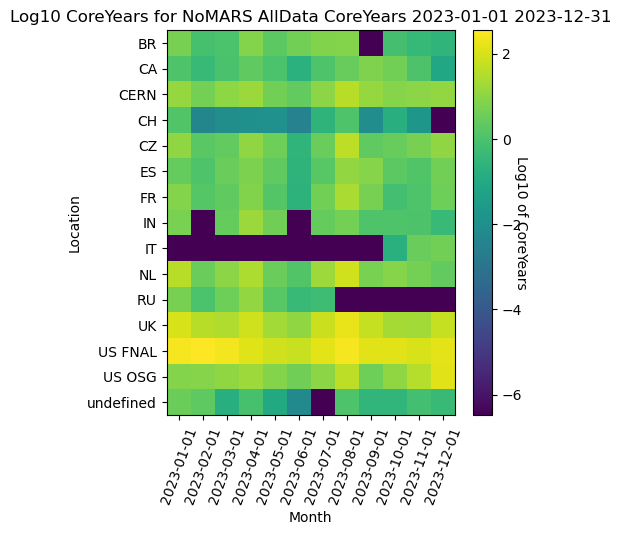

In [23]:
plttag = "%s_%s_%s_%s_%s"%("NoMARS","AllData",outunits,lowdate,highdate)
plotme(ByCountry["NoMARS"],outunits,tag=plttag,scale=scale)

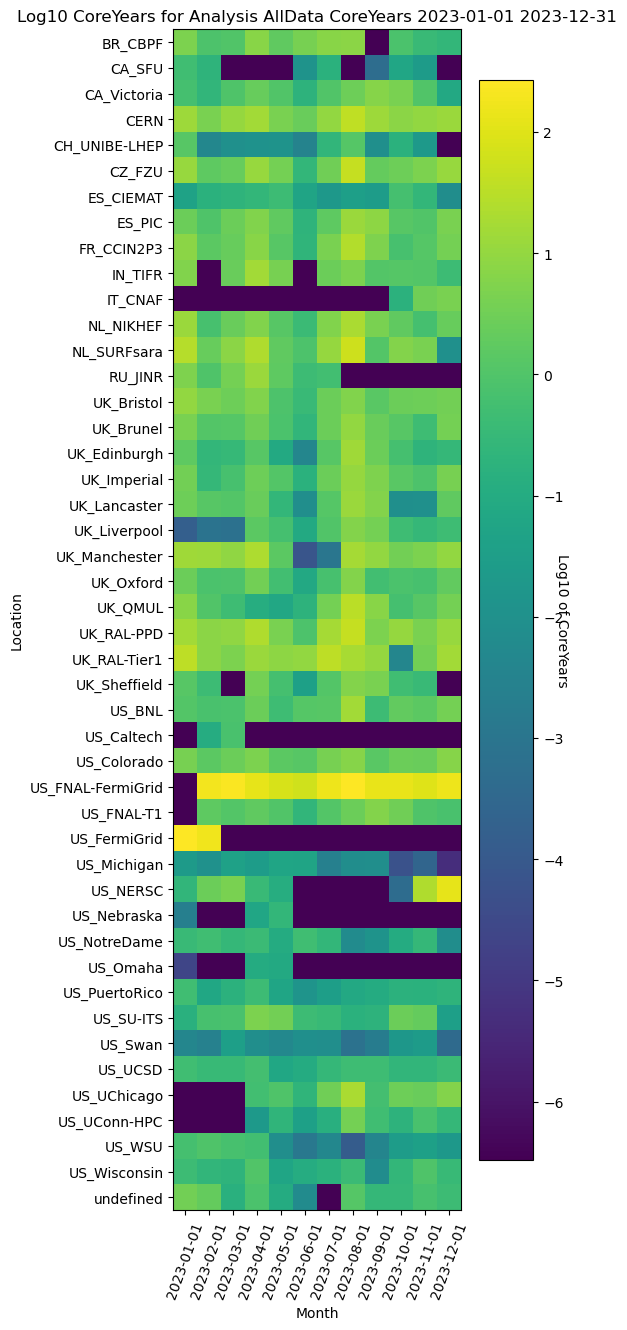

In [24]:
plttag = "%s_%s_%s_%s_%s"%("Analysis","AllData",outunits,lowdate,highdate)
plotme(Data["NoMARS"],outunits,tag=plttag,scale=scale)

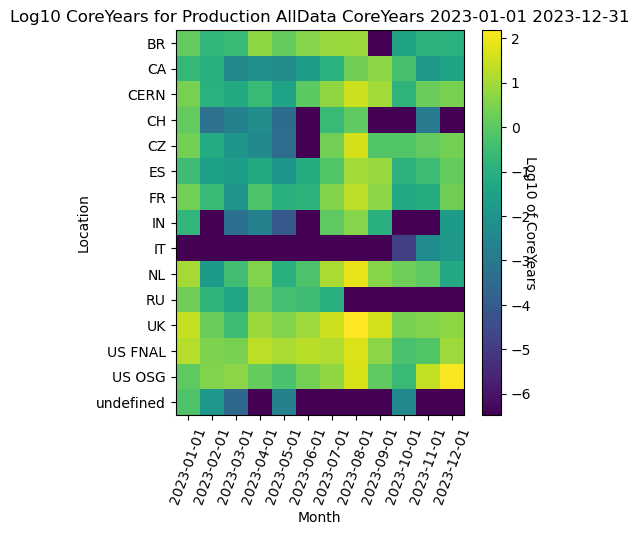

In [25]:
plttag = "%s_%s_%s_%s_%s"%("Production","AllData",outunits,lowdate,highdate)
plotme(ByCountry["Production"],outunits,tag=plttag,scale=scale)